In [1]:
!pip install mlxtend

In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [7]:
df = pd.read_csv('C:/Users/ASUS/Desktop/ML_LAB/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [9]:
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()


In [11]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [13]:
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)


In [15]:
rules[rules['confidence'] >= 0.5]
rules.sort_values(by="lift", ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
10,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,1.0,0.020940,1.158185,0.193926,0.254996,0.136580,0.430426
0,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,1.0,0.014452,1.142615,0.163569,0.200825,0.124815,0.385526
7,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,1.0,0.012591,1.127146,0.148230,0.191989,0.112804,0.376393
4,(yogurt),(other vegetables),0.282966,0.376603,0.120318,0.425204,1.129050,1.0,0.013752,1.084553,0.159406,0.223121,0.077961,0.372343
5,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,1.0,0.018342,1.107190,0.157955,0.283734,0.096813,0.450168
1,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,1.0,0.015056,1.074197,0.157772,0.253209,0.069072,0.404654
2,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,1.0,0.018827,1.070564,0.181562,0.297448,0.065913,0.462934
3,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,1.0,0.018827,1.101643,0.157802,0.297448,0.092265,0.462934
9,(tropical fruit),(whole milk),0.233710,0.458184,0.116470,0.498353,1.087672,1.0,0.009388,1.080076,0.105189,0.202407,0.074139,0.376276
6,(root vegetables),(whole milk),0.230631,0.458184,0.113135,0.490545,1.070630,1.0,0.007464,1.063522,0.085746,0.196524,0.059728,0.368733


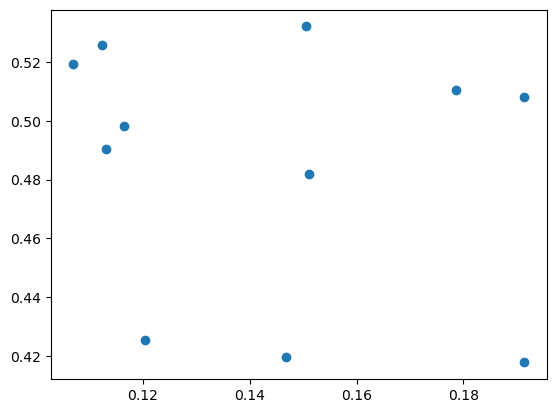

In [25]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'])  # Support vs Confidence
      # Support vs Lift


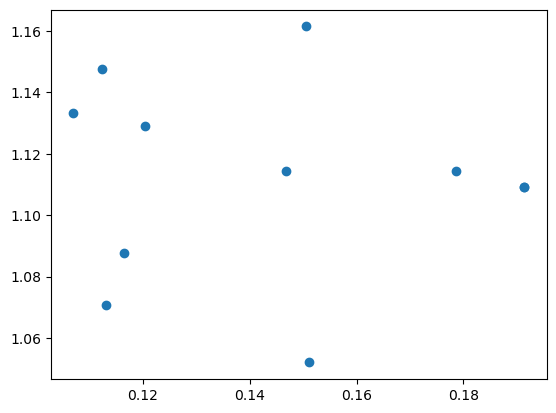

In [23]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['lift'])     